Atalov S. (TSI AUCA)

Introduction to Machine Learning and Artificial Intelligence

# Hyperparameter tuning

---

<img src = "https://eng.uber.com/wp-content/uploads/2021/07/Featured-Image.png" width = "500">

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [2]:
titanic_train = 'https://raw.githubusercontent.com/lobachevksy/teaching/main/titanic/train.csv'
df = pd.read_csv(titanic_train)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Data Preparation

In [3]:
df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [4]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

In [5]:
df['Embarked'].fillna(value=df['Embarked'].mode()[0], inplace=True)

In [6]:
df['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

In [7]:
df = pd.get_dummies(df, columns = ['Embarked'])

In [8]:
X = df.copy()

y = X.pop('Survived')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 2. Modelling (Decision Tree Classifier)

#### TASK: Show the score on train and test data

In [10]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9817415730337079, 0.7877094972067039)

## 3. Model Tuning

#### TASK: Try to find the optimal depth of the Decision Tree Classifier Model (from 1 to 20).

In [11]:
model = DecisionTreeClassifier(random_state = 0, max_depth = 3)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8342696629213483, 0.8212290502793296)

In [12]:
test_scores = []
train_scores = []
for i in range(1, 30):
    model = DecisionTreeClassifier(random_state = 0, max_depth = i)
    model.fit(X_train, y_train)
    
    train_scores.append( model.score(X_train, y_train) )

    test_scores.append( model.score(X_test, y_test) )

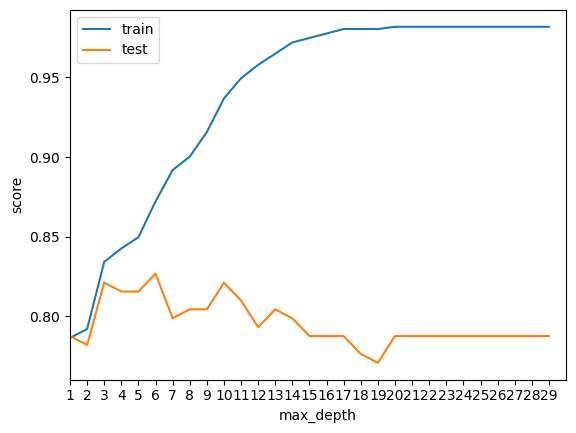

In [13]:
plt.plot(range(1, 30), train_scores, label='train');
plt.plot(range(1, 30), test_scores, label='test');
plt.xlabel('max_depth');
plt.ylabel('score');
plt.xlim(1, 30);
plt.xticks(range(1, 30))
plt.legend()
plt.show();

## 4. Random Forest Classifier Hyperparameter Tuning

In [14]:
model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9817415730337079, 0.8379888268156425)

In [15]:
list_n_estimators = [10, 30, 50, 70, 100, 120, 150, 200, 300]
list_max_depth = [1, 2, 4, 6, 8, 10, 13, 17, 20, None]
list_min_samples_split = [2, 3, 5, 7, 9, 11, 15]

## 5. Grid Search CV

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
list_n_estimators = [10, 30, 50, 70, 100, 120, 150, 200, 300]
list_max_depth = [1, 2, 4, 6, 8, 10, 13, 17, 20, None]
list_min_samples_split = [2, 3, 5, 7, 9, 11, 15]

In [18]:
grid = {'n_estimators': list_n_estimators,
        'max_depth': list_max_depth,
        'min_samples_split': list_min_samples_split}

In [19]:
grid

{'n_estimators': [10, 30, 50, 70, 100, 120, 150, 200, 300],
 'max_depth': [1, 2, 4, 6, 8, 10, 13, 17, 20, None],
 'min_samples_split': [2, 3, 5, 7, 9, 11, 15]}

In [20]:
model = RandomForestClassifier(random_state = 0)

In [21]:
search = GridSearchCV(estimator = model,
                      param_grid = grid,
                      n_jobs = -1,
                      cv = 3)

In [22]:
%%time
search.fit(X_train, y_train)

CPU times: total: 4.55 s
Wall time: 1min 19s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 13, 17, 20, None],
                         'min_samples_split': [2, 3, 5, 7, 9, 11, 15],
                         'n_estimators': [10, 30, 50, 70, 100, 120, 150, 200,
                                          300]})

In [23]:
search.best_params_

{'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 120}

In [24]:
model = RandomForestClassifier(
                               max_depth = 8,
                               min_samples_split = 5,
                               n_estimators = 120)



model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8946629213483146, 0.8324022346368715)

## 6. Randomized Search CV
Trade-off between execution time and solution quality.


#### TASK: Try to solve the problem of model hyperparameter tuning by Random Search CV algorithm:

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
distributions = {'n_estimators': list_n_estimators,
        'max_depth': list_max_depth,
        'min_samples_split': list_min_samples_split}

In [44]:
search2 = RandomizedSearchCV(estimator = model,
                      param_distributions = distributions,
                      n_jobs = -1,
                      n_iter = 500,
                      cv = 3)

In [45]:
%%time
search2.fit(X_train, y_train)

Wall time: 29.2 s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=8,
                                                    min_samples_split=5,
                                                    n_estimators=120),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 4, 6, 8, 10, 13, 17,
                                                      20, None],
                                        'min_samples_split': [2, 3, 5, 7, 9, 11,
                                                              15],
                                        'n_estimators': [10, 30, 50, 70, 100,
                                                         120, 150, 200, 300]})

In [38]:
search2.best_params_

{'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 4}

In [41]:
model2 = RandomForestClassifier(
                               max_depth = 4,
                               min_samples_split = 2,
                               n_estimators = 50)



model2.fit(X_train, y_train)
model2.score(X_train, y_train), model2.score(X_test, y_test)

(0.8441011235955056, 0.8324022346368715)